In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('TCS 2024.csv')

In [3]:
data.tail()

,Date,Open,High,Low,Close,Volume
2376,8/26/2024 15:30:00,4489.00,4552.15,4485.0,4502.45,1844164
2377,8/27/2024 15:30:00,4505.00,4510.00,4486.8,4497.15,930697
2378,8/28/2024 15:30:00,4498.75,4562.50,4457.3,4506.05,1848058
2379,8/29/2024 15:30:00,4460.00,4556.00,4460.0,4511.80,2133641
2380,8/30/2024 15:30:00,4500.00,4592.25,4487.8,4553.75,3637222


In [4]:
data['Date'] =pd.to_datetime(data['Date']).dt.date
data.set_index("Date", inplace = True)

In [5]:
# Ensure the dataset has the required columns
required_columns = ['Open', 'Low', 'High', 'Close', 'Volume']
if not all(col in data.columns for col in required_columns):
    raise ValueError(f"Dataset must contain the following columns: {required_columns}")

In [6]:
# Define independent (X) and dependent (y) variables
X = data[['Open', 'Low', 'High', 'Volume']]
y = data['Close']


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=50,min_samples_split=2, min_samples_leaf=1,random_state=155)

In [9]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=155)

In [10]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [11]:
# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [12]:
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 16.247225585286962


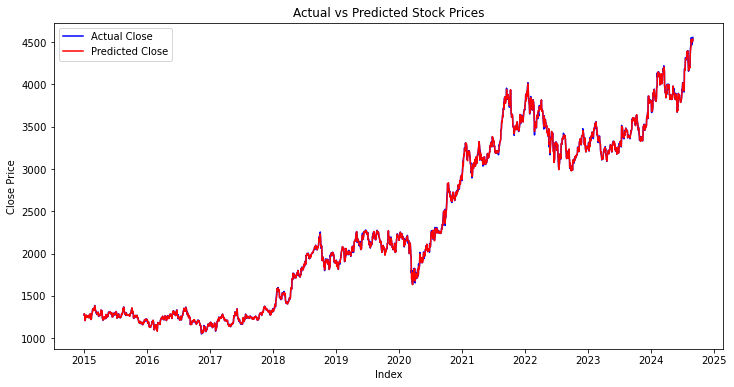

In [13]:
data['predicted_close'] = rf_model.predict(X)

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Actual Close', color='blue')
plt.plot(data.index, data['predicted_close'], label='Predicted Close',color='red')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Train RMSE: 6.118188844954115
Test RMSE: 110.41089702442952


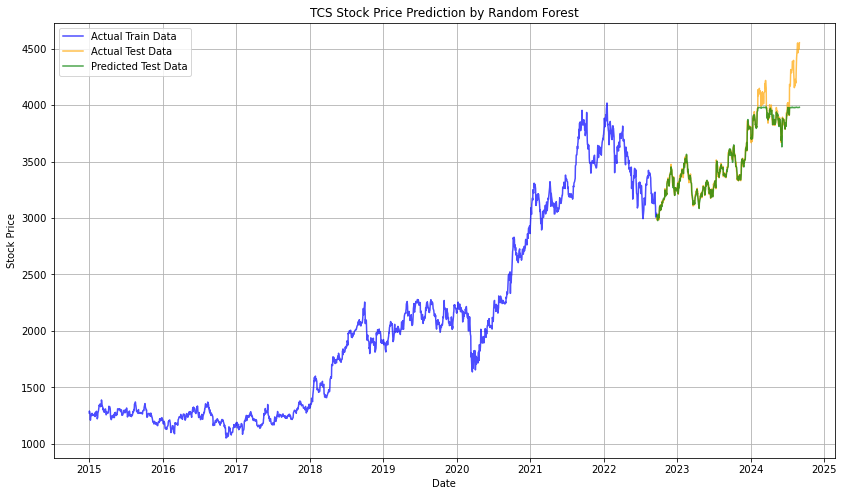

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset (replace 'data.csv' with your actual file path)
data = pd.read_csv('TCS 2024.csv')

# Ensure the 'Date' column is in datetime format and sort the data by date
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Splitting the data into features (X) and target (y)
X = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]

# Splitting into training and testing sets (time series split)
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
date_train, date_test = data['Date'].iloc[:train_size], data['Date'].iloc[train_size:]

# Initializing and training the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting the stock prices
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluating the model
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

# Visualization of Actual vs Predicted with Date
plt.figure(figsize=(14, 8))

# Plot training data
plt.plot(date_train, y_train, label="Actual Train Data", color='blue', alpha=0.7)
#plt.plot(date_train, y_train_pred, label="Predicted Train Data", color='cyan', alpha=0.7)

# Plot test data
plt.plot(date_test, y_test, label="Actual Test Data", color='orange', alpha=0.7)
plt.plot(date_test, y_test_pred, label="Predicted Test Data", color='green', alpha=0.7)

# Formatting the plot
plt.title("TCS Stock Price Prediction by Random Forest")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()
